### 数据预处理
 - 数据质量：缺失值处理、异常处理、重复数据
 - 数据结构：格式转化、数据合并

### 1. 删除重复数据，并输出去重前后的数据量
### 2. 缺失值处理
- 首先，去掉 gravatar_id 列，并查看各列的缺失值的情况
- 其次，将可转化成 boolean 变量的列字段转化成 boolean 变量（转成布尔类型是为了便于处理缺失字段，如是否存在公司、位置等等），文本数据用空字符串填充空值......
- 最后，再次看各列有无缺失值
### 3. 数据变换，将created_at、updated_at转为时间戳
### 4. 数据可视化
- 4.1 可视化bot和hunman类型的情况（展示图表自选，并在报告中说明选择原因、结果分析以及数据洞察）
- 4.2 可视化bot类型账号的created_at情况（展示图表自选，并在报告中说明选择原因、结果分析以及数据洞察）
- 4.3 可视化human类型账号的created_at情况（展示图表自选，并在报告中说明选择原因、结果分析以及数据洞察）
- 4.4 可视化bot类型账号的followers和following情况（展示图表自选，并在报告中说明选择原因、结果分析以及数据洞察）
- 4.5 可视化human类型账号的followers和following情况（展示图表自选，并在报告中说明选择原因、结果分析以及数据洞察）

In [1]:
import pandas as pd
raw_data = pd.read_csv('github_bot_raw_data.csv') 
#列字段解读
columns = [
    'actor_id',  # GitHub用户的ID (示例值: 1081405)
    'label',  # 用户标签（"Human"或"Bot"） (示例值: Human)
    'login',  # GitHub用户的登录名 (示例值: dlazesz)
    'id',  # 用户的GitHub ID (示例值: 1081405)
    'node_id',  # 用户的GitHub节点ID (示例值: MDQ6VXNlcjEwODE0MDU=)
    'avatar_url',  # GitHub头像URL (示例值: https://avatars.githubusercontent.com/u/1081405?v=4)
    'gravatar_id',  # Gravatar ID (示例值: None)
    'url',  # GitHub用户的URL (示例值: https://api.github.com/users/dlazesz)
    'html_url',  # GitHub用户的HTML URL (示例值: https://github.com/dlazesz)
    'followers_url',  # GitHub用户的粉丝URL (示例值: https://api.github.com/users/dlazesz/followers)
    'following_url',  # GitHub用户的关注URL (示例值: https://api.github.com/users/dlazesz/following{/other_user})
    'gists_url',  # 用户的GitHub Gists URL (示例值: https://api.github.com/users/dlazesz/gists{/gist_id})
    'starred_url',  # 用户的GitHub Starred URL (示例值: https://api.github.com/users/dlazesz/starred{/owner}{/repo})
    'subscriptions_url',  # 用户的GitHub订阅URL (示例值: https://api.github.com/users/dlazesz/subscriptions)
    'organizations_url',  # 用户的GitHub组织URL (示例值: https://api.github.com/users/dlazesz/orgs)
    'repos_url',  # 用户的GitHub仓库URL (示例值: https://api.github.com/users/dlazesz/repos)
    'events_url',  # 用户的GitHub事件URL (示例值: https://api.github.com/users/dlazesz/events{/privacy})
    'received_events_url',  # 用户的GitHub接收事件URL (示例值: https://api.github.com/users/dlazesz/received_events)
    'type',  # 用户类型，通常为"User" (示例值: User)
    'site_admin',  # 表示用户是否是GitHub网站管理员的标志 (示例值: False)
    'name',  # 用户的姓名 (示例值: Indig Balázs)
    'company',  # 用户所在公司 (示例值: None)
    'blog',  # 用户的博客 (示例值: None)
    'location',  # 用户的位置 (示例值: None)
    'email',  # 用户的电子邮件 (示例值: None)
    'hireable',  # 表示用户是否愿意被雇佣的标志 (示例值: None)
    'bio',  # 用户在其GitHub资料中提供的自我介绍或个人简介 (示例值: None)
    'twitter_username',  # 用户的Twitter用户名 (示例值: None)
    'public_repos',  # 用户在GitHub上的公共代码仓库数量 (示例值: 26)
    'public_gists',  # 用户的公共Gists数量 (示例值: 1)
    'followers',  # 关注该用户的其他GitHub用户数量 (示例值: 5)
    'following',  # 该用户关注的其他GitHub用户数量 (示例值: 1)
    'created_at',  # 用户的GitHub帐户创建日期 (示例值: 2011-09-26T17:27:03Z)
    'updated_at',  # 用户的GitHub帐户最后更新日期 (示例值: 2023-10-13T11:21:10Z)
]
data = raw_data[columns]

In [ ]:
# 1.去重
before_count = len(data)
print("去重前数据数量:", before_count)
data_deduplicated = data.drop_duplicates()
after_count = len(data_deduplicated)
print("去重后数据数量:", after_count)

去重前数据数量: 20358
去重后数据数量: 19779


In [50]:
# 2.缺失值处理
df = data.drop("gravatar_id", axis = 1)

print("查看各列缺失值情况:")
print(df.isnull().sum())

df['hireable'] = df['hireable'].notnull()
df['company'] = df['company'].notnull()
df['location'] = df['location'].notnull()

df.fillna({"name": ""}, inplace=True)
#df.fillna({"company": ""}, inplace=True)
df.fillna({"blog": ""}, inplace=True)
#df.fillna({"location": ""}, inplace=True)
df.fillna({"email": ""}, inplace=True)
df.fillna({"bio": ""}, inplace=True)
df.fillna({"twitter_username": ""}, inplace=True)

print("修改后查看各列缺失值情况:")
print(df.isnull().sum())

查看各列缺失值情况:
actor_id                   0
label                      0
login                      0
id                         0
node_id                    0
avatar_url                 0
url                        0
html_url                   0
followers_url              0
following_url              0
gists_url                  0
starred_url                0
subscriptions_url          0
organizations_url          0
repos_url                  0
events_url                 0
received_events_url        0
type                       0
site_admin                 0
name                    2654
company                 9229
blog                   11601
location                7287
email                  12079
hireable               16956
bio                    11262
twitter_username       15297
public_repos               0
public_gists               0
followers                  0
following                  0
created_at                 0
updated_at                 0
dtype: int64
修改后查看各列缺失值情况:
actor

In [51]:
# 3.数据转换
df['created_at'] = pd.to_datetime(df['created_at'])#.astype('int64') // 10**9
df['updated_at'] = pd.to_datetime(df['updated_at'])#.astype('int64') // 10**9
print(df[['created_at', 'updated_at']])


                     created_at                updated_at
0     2011-09-26 17:27:03+00:00 2023-10-13 11:21:10+00:00
1     2015-06-29 10:12:46+00:00 2023-10-07 06:26:14+00:00
2     2008-08-29 16:20:03+00:00 2023-10-02 02:11:21+00:00
3     2014-05-20 18:43:09+00:00 2023-10-12 12:54:59+00:00
4     2012-08-16 14:19:13+00:00 2023-10-06 11:58:41+00:00
...                         ...                       ...
20353 2014-07-02 23:27:34+00:00 2023-08-15 16:38:34+00:00
20354 2017-12-06 21:56:31+00:00 2023-07-26 18:32:25+00:00
20355 2015-11-14 14:44:05+00:00 2022-08-23 21:09:49+00:00
20356 2021-11-23 18:55:29+00:00 2023-10-06 22:50:45+00:00
20357 2016-04-22 22:11:59+00:00 2022-07-07 19:48:21+00:00

[20358 rows x 2 columns]


In [34]:
# 4.数据可视化
df.to_csv('github_bot_data.csv', index=False)
import seaborn as sns
import matplotlib.pyplot as plt

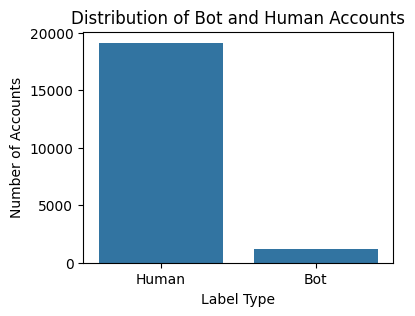

In [35]:
# 4.1
type_counts = df['label'].value_counts()
plt.figure(figsize=(4, 3))
sns.barplot(x=type_counts.index, y=type_counts.values)
plt.xlabel('Label Type')
plt.ylabel('Number of Accounts')
plt.title('Distribution of Bot and Human Accounts')
plt.show()

##### 选择原因
选择柱状图是因为它能够清晰地展示bot 和 human 类型之间的数量差异，通过柱子的高度可以直接对比出哪种类型的账号数量更多，直观易懂。
##### 结果分析
由图可知，human类型的账号数量远多于bot类型的账号。
##### 数据洞察
这种数量分布情况可以帮助我们初步了解数据的构成特点：数据说明在GitHub上，人类用户占比较大，而bot用户占比较小。

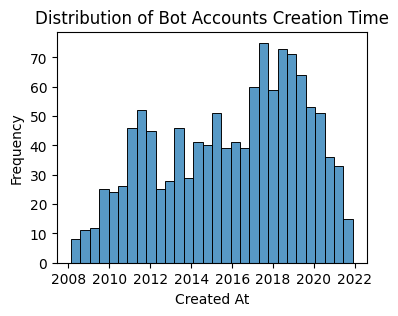

In [ ]:
# 4.2
bot_df = df[df['label'] == 'Bot']
plt.figure(figsize=(4, 3))
sns.histplot(bot_df['created_at'], bins=30)
plt.xlabel('Created At')
plt.ylabel('Frequency')
plt.title('Distribution of Bot Accounts Creation Time')
plt.show()

##### 选择原因
直方图适用于展示数据的分布情况，对于created_at这类时间序列项目，通过设置合适的 bins（这里设置为 30），可以清晰地看到 bot 类型账号在不同时间段内的创建频率，从而了解其创建时间的集中趋势和分散程度。
##### 结果分析
从直方图中可以观察到 bot 类型账号创建时间的分布特征。多峰分布，则表明 bot 账号的创建时间在多个不同时间段内较为集中，如在2011、2017、2019等年份，表明这些年份的 bot 账号创建数量较多。
##### 数据洞察
了解 bot 类型账号的创建时间分布有助于分析其背后可能存在的规律。例如，如果发现大量 bot 账号在某一特定时间段内集中创建，可能暗示着在该时间段内存在某种促使 bot 账号大量产生的因素，比如特定的营销活动、网络事件等，这对于进一步探究 bot 账号的来源和用途具有重要意义。

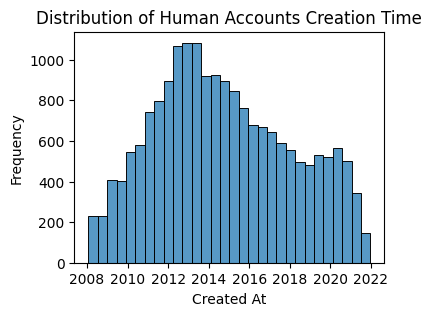

In [71]:
# 4.3
human_df = df[df['label'] == 'Human']
plt.figure(figsize=(4, 3))
sns.histplot(human_df['created_at'], bins=30)
plt.xlabel('Created At')
plt.ylabel('Frequency')
plt.title('Distribution of Human Accounts Creation Time')
plt.show()

##### 选择原因
直方图适用于展示数据的分布情况，对于created_at这类时间序列项目，通过设置合适的 bins（这里设置为 30），可以清晰地看到 human 类型账号在不同时间段内的创建频率，从而了解其创建时间的集中趋势和分散程度。
##### 结果分析
从直方图中可以观察到 human 类型账号创建时间的分布特征。如在2013等年份数据突出，表明这段时间内 human 账号的创建数量较多。
##### 数据洞察
观察 human 类型账号的创建时间变化趋势有助于理解人类在社交网络上参与的动态过程。例如，如果发现 human 账号创建时间在某一时间段内呈现出明显的上升趋势，可能意味着在该时间段内社交网络对人类用户的吸引力增加，或者有特定的社会事件促使更多人加入社交网络，这对于研究社交网络的发展和人类行为模式具有重要意义。

c:\Users\18336\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


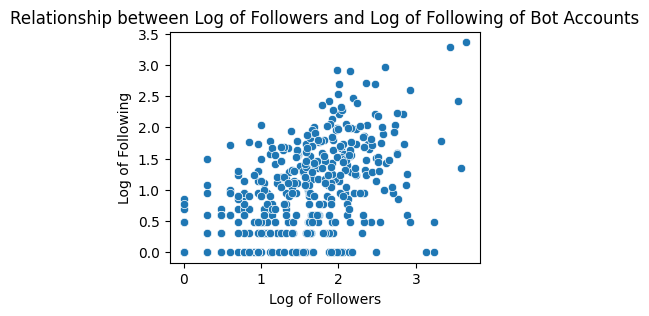

In [ ]:
# 4.4
bot_df_copy = bot_df.copy()
bot_df_copy.loc[:, 'followers_log'] = np.log10(bot_df_copy['followers'])
bot_df_copy.loc[:, 'following_log'] = np.log10(bot_df_copy['following'])
plt.figure(figsize=(4, 3))
sns.scatterplot(data=bot_df_copy, x='followers_log', y='following_log')
plt.xlabel('Log of Followers')
plt.ylabel('Log of Following')
plt.title('Relationship between Log of Followers and Log of Following of Bot Accounts')
plt.show()

##### 选择原因
散点图能够很好地展示两个变量（followers和following）之间的关系，通过观察散点的分布情况，可以直观地看出 bot 类型账号的关注者数量和关注对象数量之间的关系，比如是否存在某种线性关系、是否有明显的聚类现象等。
##### 结果分析
从散点图中可以观察到 bot 类型账号的followers和following之间的关系。散点中间部分呈现出较为明显的线性关系，说明 bot 账号的关注者数量和关注对象数量之间存在某种关联。
##### 数据洞察
了解 bot 类型账号的followers和following之间的关系有助于分析 bot 账号的社交行为模式。比如 bot 账号的关注者数量和关注对象数量之间存在较为明显的线性关系，且斜率为正，说明 bot 账号在增加关注对象的同时，也会相应地增加关注者数量，这可能暗示着 bot 账号存在某种自我推广的策略；如果散点图呈现出聚类现象，可能意味着存在不同类型的 bot 账号，其社交行为模式存在差异，需要进一步探究。

c:\Users\18336\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
c:\Users\18336\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


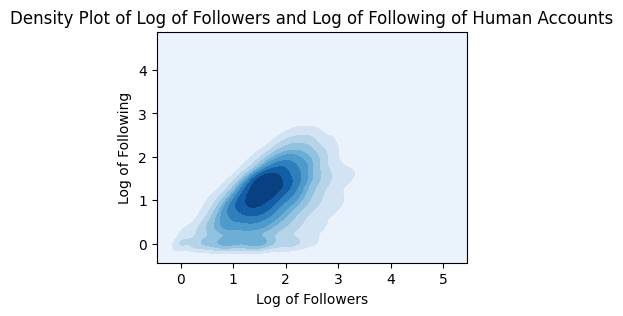

In [90]:
# 4.5
human_df_copy = human_df.copy()
human_df_copy.loc[:, 'followers_log'] = np.log10(human_df_copy['followers'])
human_df_copy.loc[:, 'following_log'] = np.log10(human_df_copy['following'])
plt.figure(figsize=(4, 3))
sns.kdeplot(data=human_df_copy, x='followers_log', y='following_log', fill=True, cmap='Blues', thresh=0)
plt.xlabel('Log of Followers')
plt.ylabel('Log of Following')
plt.title('Density Plot of Log of Followers and Log of Following of Human Accounts')
plt.show()


##### 选择原因
原本选用的还是散点图，为了能够很好地展示两个变量（followers和following）之间的关系。但由于human的账号数据过多，导致散点图过于密集，无法很好地展示数据分布情况。因此，选择使用核密度图，通过核密度估计的方法，将散点图转换为密度图，从而更好地展示数据的分布情况。
##### 结果分析
从密度图中可以看到 human 类型账号的followers和following之间的关系。密度图中间部分颜色较深，说明该部分数据较为集中。 
##### 数据洞察
了解 human 类型账号的followers和following之间的关系有助于分析 human 账号的社交行为模式。